# Filter methods

Rank the features according to some criterium, e.g. distance, information gain, dependency, consistency. Then by choosing only the top-ranked features, we hope to learn a better model.

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from matplotlib import pyplot as plt
from math import sqrt
import pandas as pd
import numpy as np
from sklearn.metrics import recall_score, precision_score, f1_score

Load the houses dataset. Because we want to focus on features, we simply remove records with missing values. Note that you should normall do this with more care! We also convert categories to dummy variables and create a train and test set.

In [8]:
df = pd.read_csv('/data/datasets/bank-additional-full.csv', delimiter=';')

In [9]:
df = df.drop(columns=df.columns[df.isnull().any()])

In [10]:
df.y = (df.y == 'yes').astype(int)

In [11]:
df = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns, drop_first=True)

In [12]:
df

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,0,1,0


In [13]:
train_X, valid_X, train_y, valid_y = train_test_split(df[df.columns.drop('y')], df.y, test_size=0.2)

In [14]:
train_X, test_X, train_y, test_y = train_test_split(train_X, train_y, test_size=0.2)

In [15]:
#poly = PolynomialFeatures(degree=1)
#train_X = poly.fit_transform(train_X)
#valid_X = poly.fit_transform(valid_X)
#test_X = poly.fit_transform(test_X)

scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
valid_X = scaler.transform(valid_X)
test_X = scaler.transform(test_X)

We first compute a baseline, simply try a model with all features, which obtains an rmse of over 50.000.

In [16]:
model = LogisticRegression(penalty='none')
model.fit(train_X, train_y)
pred_y = model.predict(valid_X)
f1_score(valid_y, pred_y)

0.5263157894736842

SKLearn has a generic method `SelectKBest` to rank features according to a feature selection criterium. Since this is a classification problem, we should use one of the classification criteria. The criterium we use is `mutual_info_regression`. For this a decision tree is learned to divide the records over thresholds of the given feature. The mutual information is highest when the decision boundary in the dataset results in less entropy, in other words more homogene classes. Another criterium you can try is `f_classif` which uses the Annova F-test to rank the features.

In [17]:
test = SelectKBest(score_func=mutual_info_classif)
fit = test.fit(train_X, train_y)
np.set_printoptions(precision=3)
select_indices = np.argsort(fit.scores_)[::-1][:train_X.shape[1]]

In [20]:
df.columns[select_indices]

Index(['duration', 'euribor3m', 'cons.price.idx', 'cons.conf.idx',
       'nr.employed', 'emp.var.rate', 'pdays', 'poutcome_nonexistent',
       'previous', 'age', 'day_of_week_wed', 'loan_yes', 'month_mar',
       'month_nov', 'month_jun', 'education_unknown', 'marital_married',
       'job_services', 'y', 'contact_telephone', 'education_basic.6y',
       'month_sep', 'month_oct', 'job_management',
       'education_professional.course', 'month_dec', 'day_of_week_mon',
       'housing_unknown', 'campaign', 'job_unknown', 'job_technician',
       'day_of_week_tue', 'default_unknown', 'housing_yes', 'month_aug',
       'job_housemaid', 'marital_unknown', 'day_of_week_thu',
       'education_illiterate', 'education_basic.9y', 'job_self-employed',
       'job_blue-collar', 'month_jul', 'education_university.degree',
       'education_high.school', 'marital_single', 'job_entrepreneur',
       'month_may', 'default_yes', 'loan_unknown', 'job_retired',
       'job_student', 'job_unemployed']

We then learn and validate $k$ models that hold the best $k$ features. We use the F1-score here, whch is de harmonic mean between recall and precision, since it is easier to compare the models with just one number.

In [21]:
valid_f1 = []
test_f1 = []
for k in range(1, train_X.shape[1]):
    # use only the k best features
    Xtrain = train_X[:,select_indices[:k]]
    Xvalid = valid_X[:,select_indices[:k]]
    Xtest = test_X[:,select_indices[:k]]
    
    # fit the model and run the evaluation
    model.fit(Xtrain, train_y)
    valid_f1.append(f1_score(valid_y, model.predict(Xvalid)))
    test_f1.append(f1_score(test_y, model.predict(Xtest)))

When then inspect the results of all these models on the validation set. You will see most improvement when moving from the bets feature to about the ten best features. After that it becomes a bit random. In fact, you should be aware that when we pick the point with the highest score on the validation set, we are likely to overestimate slightly. We illustrate that in a second plot, the uses a secondary held-out test set. Depending on how the data was randomly sampled, you will see that there is no consistency in the improvement beyond let's say the first 10-20 features. Perhaps this is also a demonstration of Occam's razor, simple models generalize better.

Text(0, 0.5, 'f1')

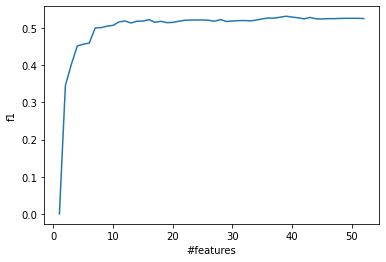

In [12]:
plt.plot(range(1, valid_X.shape[1]), valid_f1)
plt.xlabel('#features')
plt.ylabel('f1')

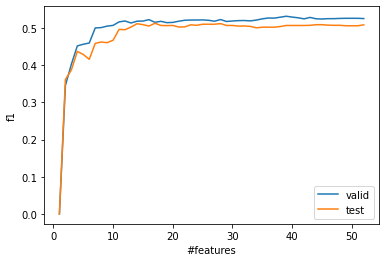

In [13]:
plt.plot(range(1, valid_X.shape[1]), valid_f1, label='valid')
plt.plot(range(1, test_X.shape[1]), test_f1, label='test')
plt.xlabel('#features')
plt.ylabel('f1')
plt.legend();